# <font color='367588'>Multivariate TimeSeries Forecasting with **Vector Auto Regression**</font>
## Objective 
#### Forecasting Stock Prices of Ethereum with VAR. 
---


The **Vector Autoregression (VAR)** model is a powerful and flexible tool for analyzing multivariate time series. It generalizes the univariate autoregressive model by allowing multiple interrelated time series to influence each other dynamically. VAR models are especially effective for economic and financial data, often outperforming univariate and structural models in forecasting.

#### VAR(p) Equation:

$$
\mathbf{y}_t = c + A_1 \mathbf{y}_{t-1} + A_2 \mathbf{y}_{t-2} + \dots + A_p \mathbf{y}_{t-p} + \varepsilon_t
$$

Where:

- $\mathbf{y}_t$ is an $n \times 1$ vector of endogenous variables,  
- $c$ is a vector of intercepts,  
- $A_i$ are coefficient matrices,  
- $\varepsilon_t$ is a vector of white noise errors.

#### The model captures **lagged interactions** among all variables, making it suitable for dynamic systems analysis under stationarity assumptions.
---






## Approach Breakdown

<p align="center"> 
<b>1. Data Preparation and Analysis</b> <br>
Collect, clean, and explore the multivariate time series data. Identify missing values, visualize trends or seasonality, and perform ACF/PACF analysis. 
</p>

<p align="center">⬇️</p>

<p align="center">
<b>2. Feature Engineering</b> <br>
Create additional features from the data to later incorporate in VAR forecasting.
</p>

<p align="center">⬇️</p>

<p align="center">
<b>3. Stationarity Checks</b> <br>
Use Augmented Dickey-Fuller (ADF) or KPSS tests to check for stationarity. Apply differencing or transformations if necessary.
</p>

<p align="center">⬇️</p>

<p align="center">
<b>4. Granger Causality Test for Variable Selection</b> <br>
Identify predictive relationships between variables using Granger causality to refine model inputs.
</p>

<p align="center">⬇️</p>

<p align="center">
<b>5. Model Order/Lag Selection (AIC/BIC)</b> <br>
Choose the optimal lag length based on the lowest AIC/BIC values for better model fit and efficiency.
</p>

<p align="center">⬇️</p>

<p align="center">
<b>6. Model Training</b> <br>
Fit the VAR model using selected variables and optimal lag to capture dynamic interdependencies.
</p>

<p align="center">⬇️</p>

<p align="center">
<b>7. Forecasting</b> <br>
Generate forecasts on the test set using the trained model.
</p>

<p align="center">⬇️</p>

<p align="center">
<b>8. Evaluation</b> <br>
Assess performance using RMSE, MAE, or other relevant metrics and validate forecasts against actual data.
</p>




# Data Loading and Visualization

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
ethereum_ts = pd.read_csv("I:/CQAI/TSA/TSD/TSD/archive/ETH-USD (2017-2024).csv",parse_dates=["Date"],index_col=["Date"])


In [4]:
ethereum_ts

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09
2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1.069680e+09
...,...,...,...,...,...,...
2024-01-17,2587.044678,2592.737061,2508.432861,2528.369385,2528.369385,1.044102e+10
2024-01-18,2528.593262,2546.263916,2426.135498,2467.018799,2467.018799,1.190003e+10
2024-01-19,2468.688965,2501.305176,2414.710938,2489.498535,2489.498535,1.140528e+10


In [5]:
print("No of nan rows:\n",ethereum_ts.isnull().sum())

No of nan rows:
 Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [6]:
ethereum_ts =ethereum_ts.dropna()


In [7]:
ethereum_ts.shape

(2263, 6)

In [8]:
ethereum_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2263 entries, 2017-11-10 to 2024-01-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2263 non-null   float64
 1   High       2263 non-null   float64
 2   Low        2263 non-null   float64
 3   Close      2263 non-null   float64
 4   Adj Close  2263 non-null   float64
 5   Volume     2263 non-null   float64
dtypes: float64(6)
memory usage: 123.8 KB


In [9]:
ethereum_ts.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2.263000e+03
mean,1248.213140,1283.972388,1208.851543,1248.811361,1248.970441,1.205243e+10
std,1118.835543,1150.922648,1082.560829,1118.664405,1118.566081,1.012443e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,231.636727,236.766563,227.149369,231.901916,231.901916,4.845689e+09
50%,1038.186646,1090.229980,956.325012,1039.099976,1039.099976,9.401190e+09
75%,1870.983582,1905.373352,1844.880860,1871.952942,1871.952942,1.657259e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [10]:
ethereum_ts.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09
2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1.069680e+09
2017-11-15,337.963989,340.911987,329.812988,333.356995,333.356995,7.226660e+08
2017-11-16,333.442993,336.158997,323.605988,330.924011,330.924011,7.972540e+08
2017-11-17,330.166992,334.963989,327.523010,332.394012,332.394012,6.217330e+08
2017-11-18,331.980011,349.615997,327.687012,347.612000,347.612000,6.496390e+08


In [11]:
ethereum_ts.duplicated().sum()

0

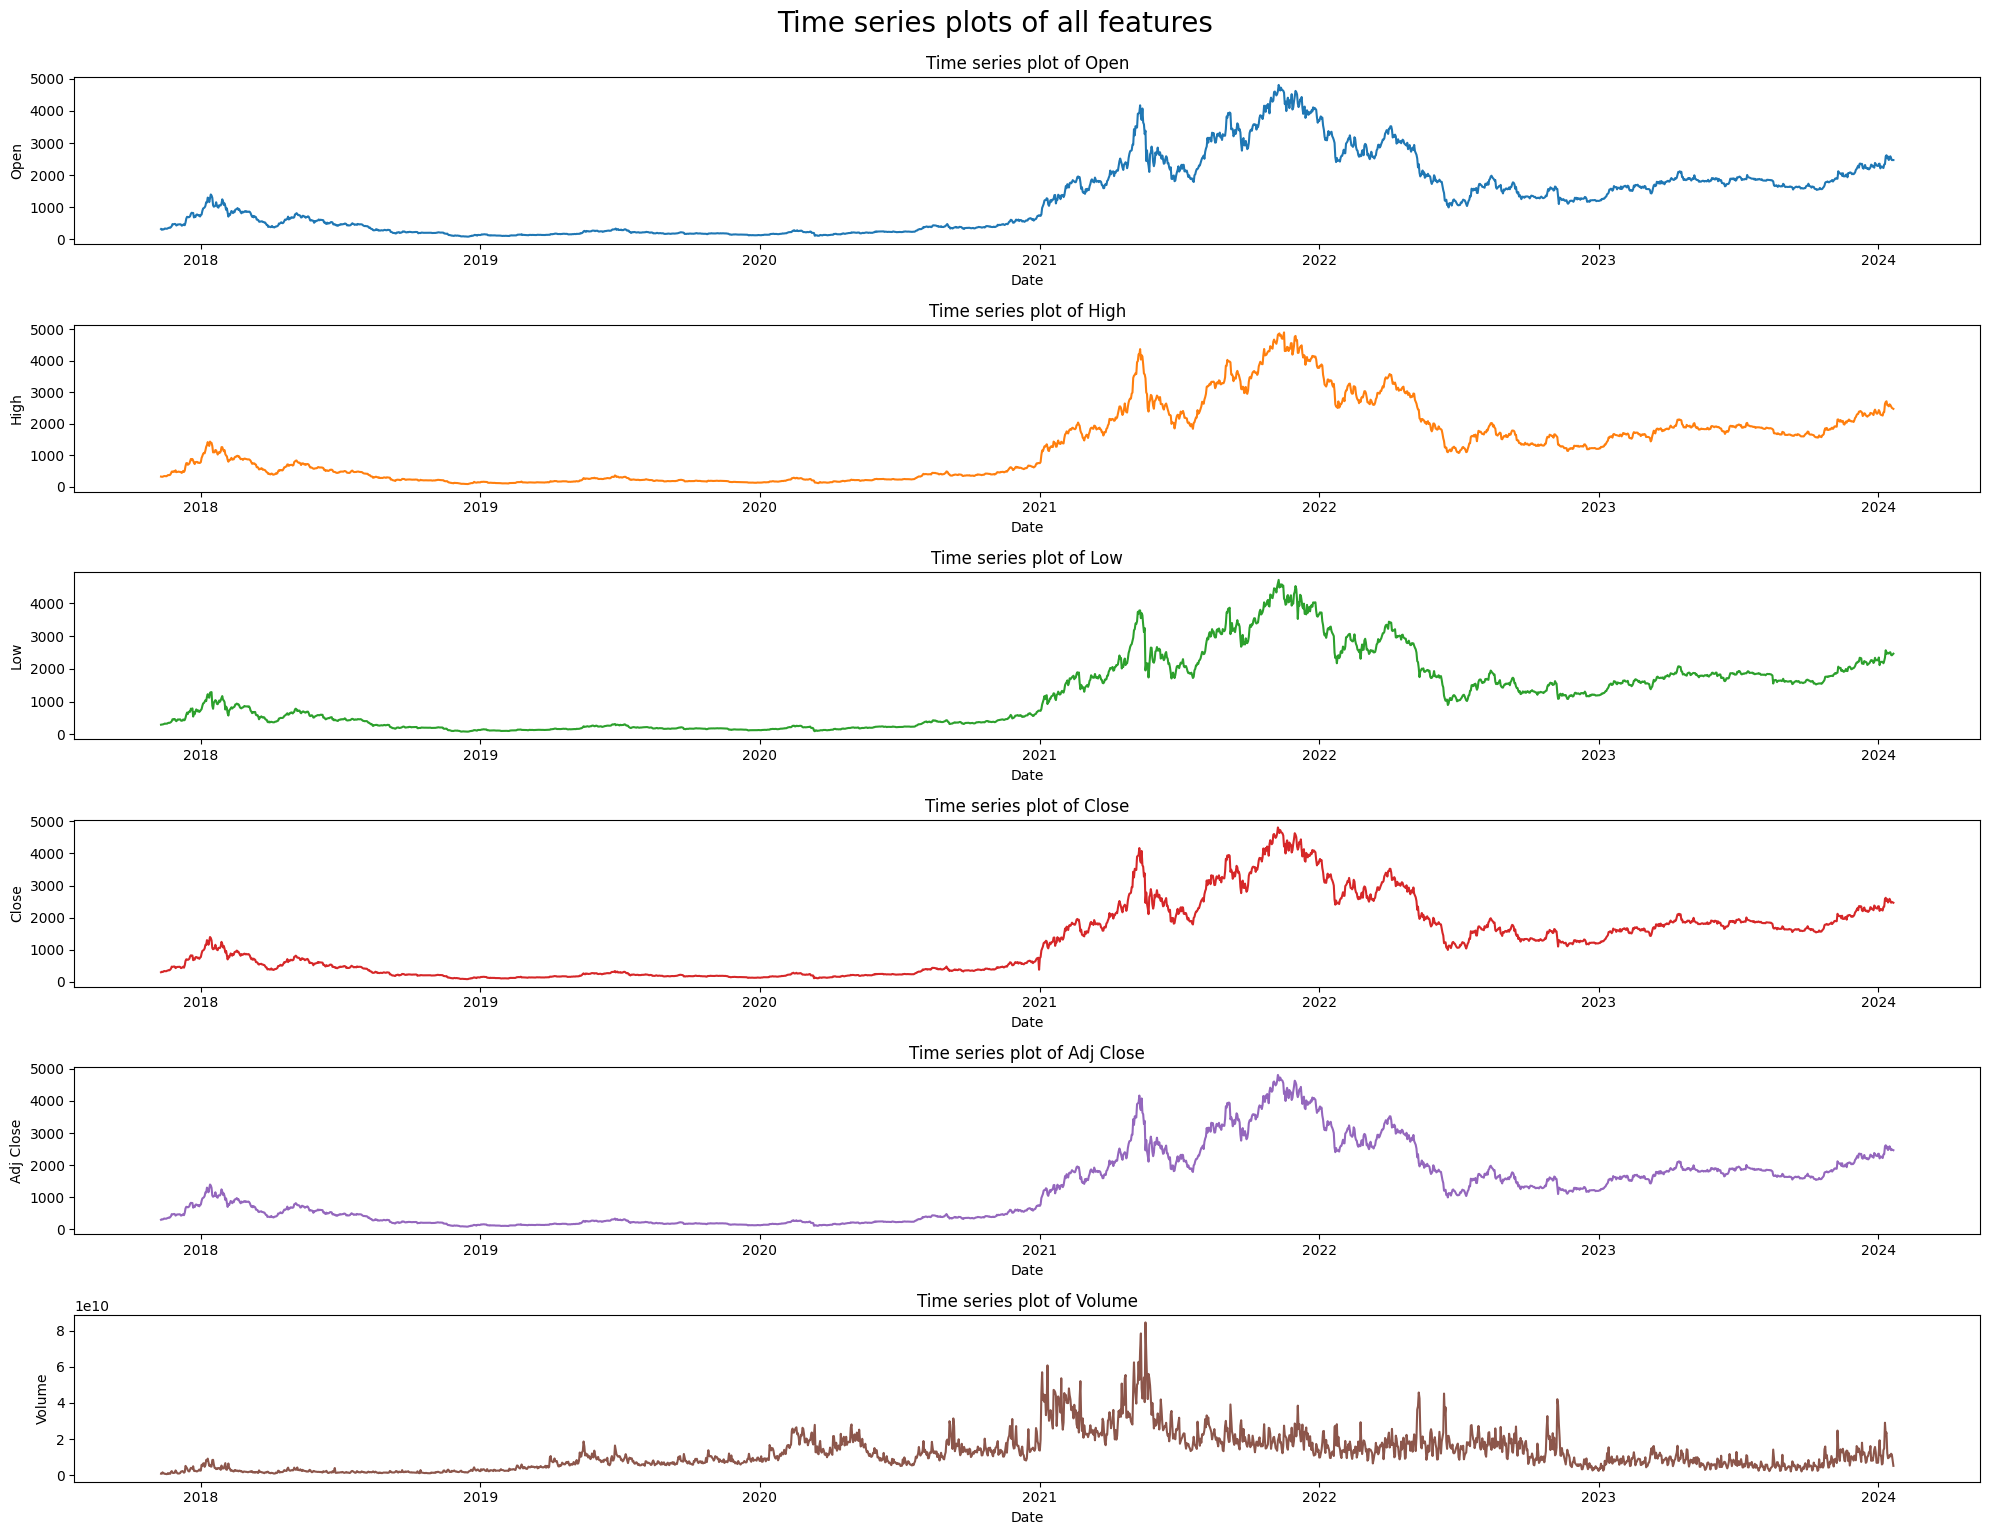

In [ ]:


plt.figure(figsize=(20, 15))

for i, col in enumerate(ethereum_ts.columns, 1):
    plt.subplot(6, 1, i)
    plt.plot(ethereum_ts.index, ethereum_ts[col], label=col, color=sns.color_palette()[i - 1])
    plt.title(f"Time series plot of {col}")
    plt.xlabel("Date")
    plt.ylabel(col)  
    plt.tight_layout()

plt.suptitle("Time series plots of all features", fontsize=20, y=1.02)
plt.show()

# Feature Engineering

- Now we some additional  features from the dataset, including the percentage difference between High and Low as a measure for intra-day price movement , percentage difference between next-day Open and Close as a measure for overnight price movement and also some technical indiactors.


#### Ethereum Intraday vs. Overnight Price Movements

* **High intraday volatility (2018–2021)**: Frequent spikes above 60% reflect intense trading activity and market sensitivity, tapering off in recent years.Volatility appears to taper off in later years, possibly reflecting changing market dynamics.

* **Overnight movements are broader but mean-reverting**: Typically range between **-20% and +20%**, centered around zero, indicating relatively stable non-trading hours.

This suggests Ethereum exhibits greater volatility during trading hours than overnight, underscoring that key price movements and reactions to information tend to occur intraday rather than after hours.


---



In [ ]:


#Percentage difference between High and Low (intra-day price movement)
ethereum_ts['Intraday_Price_movement'] = ((ethereum_ts['High'] - ethereum_ts['Low']) / ethereum_ts['Low']) * 100

ethereum_ts['Overnight_Price_movement'] = ((ethereum_ts['Open'].shift(1) - ethereum_ts['Close']) / ethereum_ts['Close']) * 100

cols = ['Intraday_Price_movement', 'Overnight_Price_movement']

plt.figure(figsize=(15,10))
for i , col in enumerate(cols,1):
    plt.subplot(2,1,i)    
    plt.plot(ethereum_ts.index, ethereum_ts[col], label=col, color=sns.color_palette()[i - 1])
    plt.title(col)
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.tight_layout()  
    
plt.suptitle("Time series plots of intraday ,overnight percentage differences", fontsize=20, y=1.02)
plt.show()

#### Analyse some Technical Indicators 

| Category   | Indicator                    | Description                                   |
| ---------- | ---------------------------- | --------------------------------------------- |
| Trend      | **EMA** (Exponential MA)     | Shows smoothed price trends                   |
| Volatility | **ATR** (Average True Range) | Measures market volatility                    |



In [ ]:

import ta

#Add EMA (Trtsd indicator)
ethereum_ts['EMA'] = ta.trend.ema_indicator(close=ethereum_ts['Close'], window=365)


#Add ATR (Volatility indicator)
ethereum_ts['ATR'] = ta.volatility.average_true_range(high=ethereum_ts['High'], low=ethereum_ts['Low'], close=ethereum_ts['Close'], window=14)



#### Interpretation of each technical indicator from the graph:


#### **1.EMA**

* **What it shows**: This compares the actual closing price of Ethereum with its 14-day Exponential Moving Average (EMA).
* **Insights**:

  * **Trend Detection**: The EMA tracks price trends smoothly. When the Close price is **consistently above EMA**, it indicates **bullish momentum**; when **below EMA**, bearish.
  * **Crossovers**: The crossover points (price crossing EMA) can signal potential entry/exit points.
  * **Post-2021 trends**: Ethereum's price shows clear **bullish trends** in 2021 followed by **corrections**, visible where the price dips below the EMA.

---

---

#### **3. ATR – Average True Range**

* **What it shows**: Measures **volatility**.
* **Insights**:

  * **Low ATR** = Low volatility/stable market.
  * **High ATR** = High volatility/large price swings.
  * **Observation**: We notive huge strating from late 2020 followed by high spikes in 2021 —this coincides with Ethereum’s rapid price increase, reflecting massive market movement.
  * **Post-2022**: ATR steadily declines, showing **reduced volatility**, potentially indicating market **maturity or consolidation**.

---



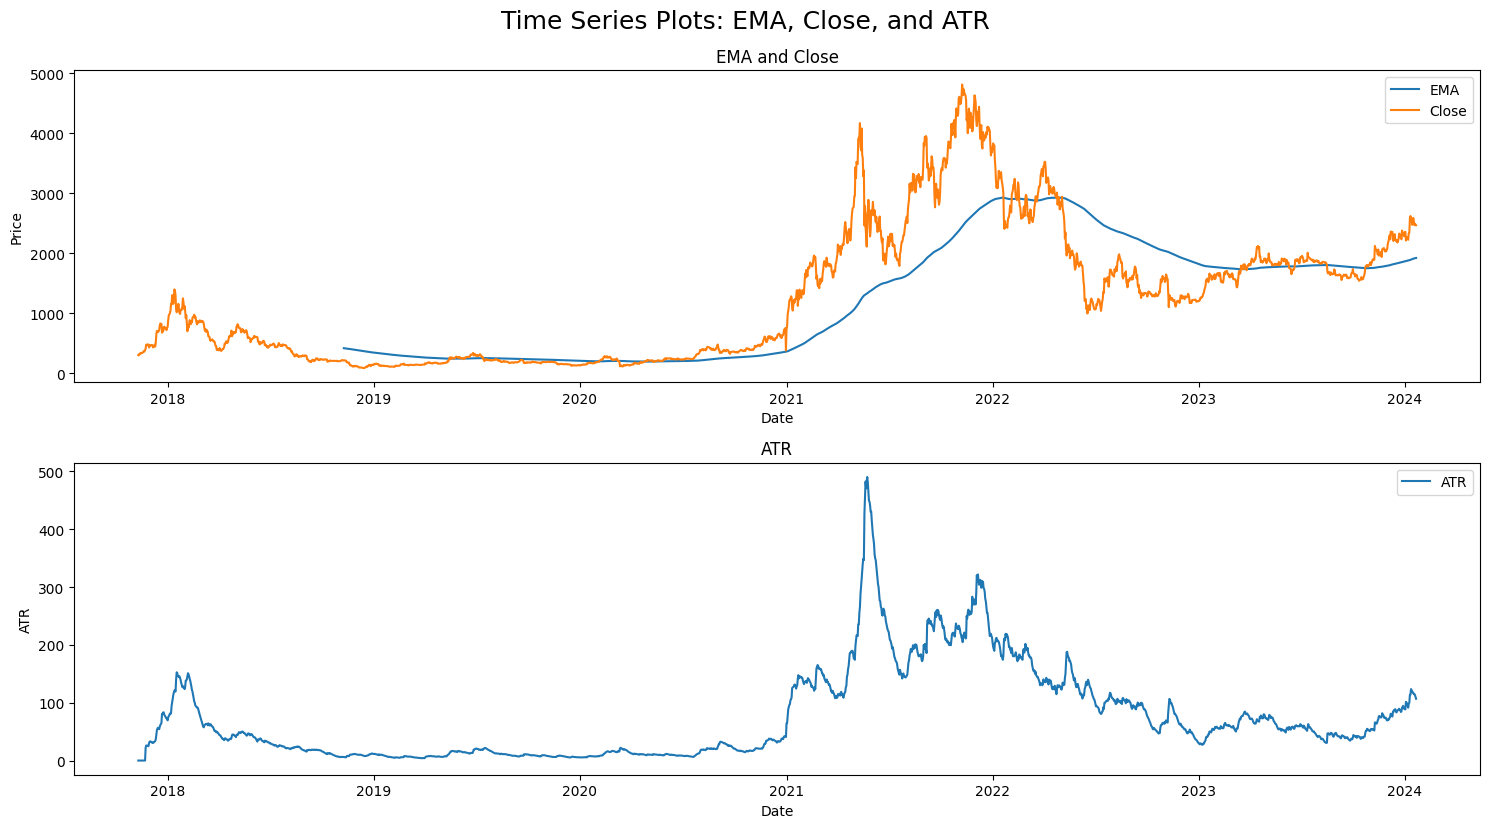

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plot configurations
plot_configs = [
    {"columns": ["EMA", "Close"], "title": "EMA and Close", "ylabel": "Price"},
    {"columns": ["ATR"], "title": "ATR", "ylabel": "ATR"}
]

plt.figure(figsize=(15, 8))

for i, config in enumerate(plot_configs, 1):
    plt.subplot(2, 1, i)
    for col in config["columns"]:
        plt.plot(ethereum_ts.index, ethereum_ts[col], label=col, color=sns.color_palette()[config["columns"].index(col)])
    plt.title(config["title"])
    plt.xlabel("Date")
    plt.ylabel(config["ylabel"])
    plt.legend()

plt.tight_layout()
plt.suptitle("Time Series Plots: EMA, Close, and ATR", fontsize=18, y=1.03)
plt.show()


# Check for stationarity of Variables.
- Before modeling with VAR it is importatnt to make sure the varaibles are staionary.
- For this we use ADF and KPSS test on each of the variable in our dataset

In [32]:


from statsmodels.tsa.stattools import adfuller
for column in ethereum_ts.columns:

        result_adfuller = adfuller(ethereum_ts[column].dropna() )
        #print("ADF Statistic:","" result_adfuller[0])
        #print("p-value:", result_adfuller[1])
        #print("Critical Values:", result_adfuller[4])# this prints the critical values as key_value pair 
        if result_adfuller[0]>(result_adfuller[4])['5%']:
            print(f"The time seriess is Non_Stationary for {column}")
        else:
            print(f"THe result is stationary for {column} ")

The time seriess is Non_Stationary for Open
The time seriess is Non_Stationary for High
The time seriess is Non_Stationary for Low
The time seriess is Non_Stationary for Close
The time seriess is Non_Stationary for Adj Close
The time seriess is Non_Stationary for Volume
THe result is stationary for Intraday_Price_movement 
THe result is stationary for Overnight_Price_movement 
The time seriess is Non_Stationary for EMA
The time seriess is Non_Stationary for ATR


In [34]:
from statsmodels.tsa.stattools import kpss

import warnings
warnings.filterwarnings('ignore')

for column in ethereum_ts.columns:
    try:
        result_kpss = kpss(ethereum_ts[column].dropna(), regression='c', nlags='auto')
        stat = result_kpss[0]
        p_value = result_kpss[1]
        critical_values = result_kpss[3]

        if stat > critical_values['5%']:
            print(f"The time series is **Non-Stationary** for {column} ")
        else:
            print(f"The time series is **Stationary** for {column} ")
    
    except Exception as e:
        print(f"KPSS test failed for {column}: {e}")


The time series is **Non-Stationary** for Open 
The time series is **Non-Stationary** for High 
The time series is **Non-Stationary** for Low 
The time series is **Non-Stationary** for Close 
The time series is **Non-Stationary** for Adj Close 
The time series is **Non-Stationary** for Volume 
The time series is **Non-Stationary** for Intraday_Price_movement 
The time series is **Stationary** for Overnight_Price_movement 
The time series is **Non-Stationary** for EMA 
The time series is **Non-Stationary** for ATR 


# Differncing varaibles to achieve staionarity

In [ ]:

non_stationary_cols=['Close',"EMA","High","Open","Volume","Intraday_Price_movement","EMA","ATR"]

for col in non_stationary_cols:

    ethereum_ts[col] = ethereum_ts[col].diff()
    #ts[col] = ts[col] - ts[col].shift(1)


In [44]:

from statsmodels.tsa.stattools import adfuller
for column in non_stationary_cols:

        result_adfuller = adfuller(ethereum_ts[column].dropna() )
        #print("ADF Statistic:", result_adfuller[0])
        #print("p-value:", result_adfuller[1])
        #print("Critical Values:", result_adfuller[4])# this prints the critical values as key_value pair 
        if result_adfuller[0]>(result_adfuller[4])['5%']:
            print(f"The time seriess is Non_Stationary for {column}")
        else:
            print(f"THe result is stationary for {column} ")

THe result is stationary for Close 
THe result is stationary for EMA 
THe result is stationary for High 
THe result is stationary for Open 
THe result is stationary for Volume 
THe result is stationary for Intraday_Price_movement 
THe result is stationary for EMA 
THe result is stationary for ATR 


In [ ]:
from statsmodels.tsa.stattools import kpss

import warnings
warnings.filterwarnings('ignore')

for column in non_stationary_cols:
    try:
        result_kpss = kpss(ethereum_ts[column].dropna(), regression='c', nlags='auto')
        stat = result_kpss[0]
        p_value = result_kpss[1]
        critical_values = result_kpss[3]

        if stat > critical_values['5%']:
            print(f"The time series is Non-Stationary for {column} ")
        else:
            print(f"The time series is Stationary for {column} ")
    
    except Exception as e:
        print(f"KPSS test failed for {column}: {e}")


The time series is **Stationary** for Close 
The time series is **Stationary** for EMA 
The time series is **Stationary** for High 
The time series is **Stationary** for Open 
The time series is **Stationary** for Volume 
The time series is **Stationary** for Intraday_Price_movement 
The time series is **Stationary** for EMA 
The time series is **Stationary** for ATR 


### A Simple Preprocessing Step

- Before proceeding, we ensure all variables are on a **common scale** .This step  ensures we get consistent and reliable results for the below mentioned Grangers causality test

To handle this, any variable with a disproportionately large range will be **normalized between 0 and 1** using the `MinMaxScaler` from `sklearn`.


In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd


all_cols =['Close',"High","Open","Volume","Intraday_Price_movement","EMA","ATR","Overnight_Price_movement"]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Drop NA rows and scale the data
scaled_data = scaler.fit_transform(ethereum_ts[all_cols].dropna())

# Create DataFrame with scaled values
ethereum_ts_scaled = pd.DataFrame(
    scaled_data,
    columns=all_cols,  # Use the correct list of column names
    index=ethereum_ts[all_cols].dropna().index
)


In [47]:
print("Min:\n", ethereum_ts_scaled.min())
print("Max:\n", ethereum_ts_scaled.max())

Min:
 Close                       0.0
High                        0.0
Open                        0.0
Volume                      0.0
Intraday_Price_movement     0.0
EMA                         0.0
ATR                         0.0
Overnight_Price_movement    0.0
dtype: float64
Max:
 Close                       1.0
High                        1.0
Open                        1.0
Volume                      1.0
Intraday_Price_movement     1.0
EMA                         1.0
ATR                         1.0
Overnight_Price_movement    1.0
dtype: float64


# Determining Predictable Power between close and other variables  using **Granger Causality test**.
- The test runs regressions for lag 1 to lag 10.

- For each lag, it tests whether lagged values of the second column help explain the first (Close).

- If feature X Granger-causes Y, it means that past values of X contain information that helps predict future values of Y, above and beyond what past values of Y alone can provide.

- p < 0.05 → Strong evidence of Granger causality  

- p > 0.05 → No significant predictive relationship

**NOTE** Granger causality doesn’t mean true "cause and effect." Instead, it tests predictive power:



In [48]:
from statsmodels.tsa.stattools import grangercausalitytests

for col in all_cols:
    if col == "Close":
        continue  # Skip testing Close against it
   
    print(f"\nTesting whether {col} Granger-causes Close?:")
    granger = grangercausalitytests(ethereum_ts_scaled[[col, "Close"]], maxlag=10, verbose=True)



Testing whether High Granger-causes Close?:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=972.0826, p=0.0000  , df_denom=1893, df_num=1
ssr based chi2 test:   chi2=973.6231, p=0.0000  , df=1
likelihood ratio test: chi2=785.7674, p=0.0000  , df=1
parameter F test:         F=972.0826, p=0.0000  , df_denom=1893, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=630.5803, p=0.0000  , df_denom=1890, df_num=2
ssr based chi2 test:   chi2=1264.4970, p=0.0000  , df=2
likelihood ratio test: chi2=968.7126, p=0.0000  , df=2
parameter F test:         F=630.5803, p=0.0000  , df_denom=1890, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=453.8047, p=0.0000  , df_denom=1887, df_num=3
ssr based chi2 test:   chi2=1366.4645, p=0.0000  , df=3
likelihood ratio test: chi2=1028.7804, p=0.0000  , df=3
parameter F test:         F=453.8047, p=0.0000  , df_denom=1887, df_num=3

Granger Causality
number of lags (no ze

### Variable Selection

Based on the p-values observed above, the following variables show statistical significance:

- `high`
- `low`
- `open`
- `volume`
- `Overnight_Price_Movement`
- `ATR`

However, including both `high` and `low` may introduce redundancy, as they often capture similar information. To maintain consistency and avoid multicollinearity, we choose to **retain `high`** and **drop `low`**.


In [50]:

selected_cols = ["Open", "Close", "High", "Volume","Overnight_Price_movement","ATR"]


forecast_df = ethereum_ts_scaled[selected_cols].copy()

In [51]:
forecast_df

,Open,Close,High,Volume,Overnight_Price_movement,ATR
Date,,,,,,
2018-11-11,0.633679,0.631758,0.558936,0.408502,0.208957,0.176748
2018-11-12,0.631354,0.631944,0.559392,0.406173,0.222597,0.176531
2018-11-13,0.631087,0.630107,0.557752,0.408961,0.233395,0.177133
2018-11-14,0.629578,0.615082,0.556463,0.420095,0.347398,0.197826
2018-11-15,0.615491,0.632172,0.538174,0.407415,0.333797,0.182778
...,...,...,...,...,...,...
2024-01-16,0.658112,0.685095,0.619185,0.425178,0.176748,0.175341
2024-01-17,0.683215,0.591763,0.540033,0.398459,0.208488,0.154422
2024-01-18,0.592827,0.590367,0.515762,0.426475,0.255207,0.181964


In [52]:

 
train = forecast_df[:int(0.85*(len(ethereum_ts_scaled)))]#85 %percent for train
test = forecast_df[int(0.9*(len(ethereum_ts_scaled))):]#15% percent for test


In [54]:
train.isnull().sum()

Open                        0
Close                       0
High                        0
Volume                      0
Overnight_Price_movement    0
ATR                         0
dtype: int64

In [53]:
print(train.shape)
test.shape

(1612, 6)


(190, 6)

# Modeling with **VAR**

In [55]:
from statsmodels.tsa.api import VAR
model = VAR(train,freq='D')  # 'D' for daily frequency


# Selecting the Appropriate Order using AIC

In [56]:
model.select_order(maxlags =20).summary()

,AIC,BIC,FPE,HQIC
0,-36.26,-36.24,1.795e-16,-36.25
1,-40.91,-40.76,1.717e-18,-40.85
2,-41.62,-41.36,8.384e-19,-41.53
3,-41.89,-41.50,6.446e-19,-41.74
4,-42.11,-41.60,5.175e-19,-41.92
5,-42.24,-41.61*,4.516e-19,-42.01
6,-42.34,-41.59,4.076e-19,-42.07
7,-42.38,-41.51,3.925e-19,-42.06
8,-42.46,-41.46,3.644e-19,-42.09
9,-42.53,-41.42,3.372e-19,-42.12*


In [57]:
results = model.fit(20)  # 20th lag = Minimum AIC
#results.summary()

In [59]:
import pandas as pd

n_obs = 20  #no of steps to forecast 

lag= results.k_ar

input_data = train.values[-lag:]  # last 20 lags
forecast = results.forecast(y=input_data, steps=n_obs)

print("Forecasted values:\n", forecast)


Forecasted values:
 [[0.66460964 0.63840181 0.59504205 0.41553697 0.1887748  0.17667433]
 [0.63838963 0.6266288  0.55339989 0.41602096 0.21226734 0.17712401]
 [0.62698215 0.61067049 0.5420583  0.39502439 0.22733903 0.17653651]
 [0.61102043 0.63832843 0.5432508  0.39318816 0.21950696 0.16870055]
 [0.63848717 0.64352157 0.57490597 0.40404019 0.20619607 0.17848422]
 [0.64085296 0.63206968 0.56080366 0.40535018 0.21049466 0.170804  ]
 [0.63108807 0.63973994 0.57109507 0.4227457  0.21122339 0.17652736]
 [0.64053338 0.62608648 0.57009495 0.4184742  0.21471765 0.18882127]
 [0.62562439 0.61912989 0.54402463 0.41278879 0.22461768 0.18912954]
 [0.61967212 0.63106892 0.54914763 0.40581836 0.22004671 0.18849684]
 [0.63026742 0.63019718 0.55319268 0.38709233 0.21559639 0.17886285]
 [0.62942506 0.6315342  0.55511158 0.39646683 0.21558187 0.176949  ]
 [0.63084997 0.63718679 0.5635481  0.41702348 0.21310279 0.18395943]
 [0.6360298  0.63861296 0.56727921 0.41829671 0.20896728 0.17864951]
 [0.6385011  0

In [60]:
test_new =test[:n_obs] 
test_new

,Open,Close,High,Volume,Overnight_Price_movement,ATR
Date,,,,,,
2023-07-15,0.587395,0.627156,0.483853,0.322742,0.246626,0.145502
2023-07-16,0.626985,0.627222,0.555973,0.406152,0.221116,0.152812
2023-07-17,0.626672,0.624297,0.554208,0.438452,0.223157,0.180827
2023-07-18,0.623960,0.622914,0.541093,0.395214,0.225918,0.163811
2023-07-19,0.622685,0.626667,0.562394,0.409579,0.224457,0.163710
2023-07-20,0.626155,0.633928,0.559748,0.424985,0.217407,0.167142
2023-07-21,0.633681,0.633343,0.546612,0.370509,0.213043,0.153894
2023-07-22,0.632251,0.613886,0.551893,0.399205,0.226378,0.171430
2023-07-23,0.614669,0.649284,0.566747,0.411941,0.215605,0.174011


In [61]:
# Convert to DataFrame
forecasted_df = pd.DataFrame(forecast, index=test_new.index, columns=forecast_df.columns)


# Plotting results

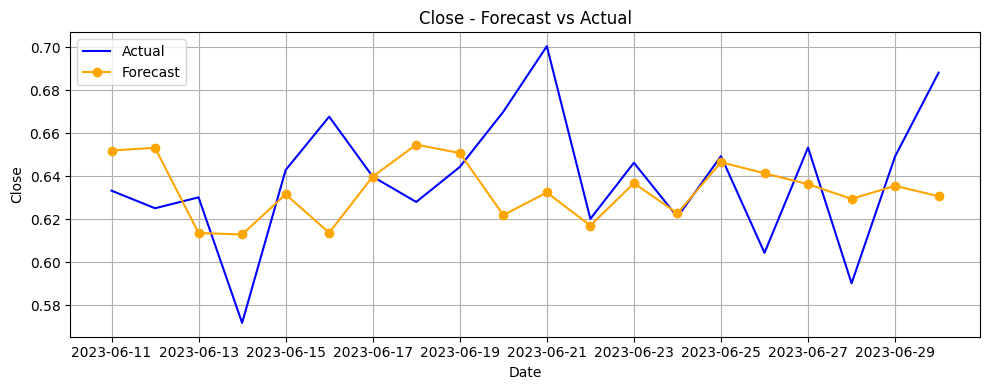

In [216]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

# Plot actual and forecasted values
plt.plot(test_new.index[:n_obs], test_new["Close"].iloc[:n_obs], label='Actual', color='blue')
plt.plot(forecasted_df.index, forecasted_df["Close"], label='Forecast', color='orange', marker='o')

plt.title(f"{"Close"} - Forecast vs Actual") 
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Lets Evaluate

In [ ]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean
rmse_close = math.sqrt(mean_squared_error(test_new['Close'], forecasted_df['Close']))

print('Mean value of close is : {}. Root Mean Squared Error is :{}'.format(mean(test_new['Close']),rmse_close))


Mean value of close is : 0.6387984987697474. Root Mean Squared Error is :0.03219168618309014


#### The rmse should be much less then the mean value and from the above results we see for forecasting 20 steps ahead we get Rmse (0.03) <<<  Mean (0.63)